In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [2]:
pip install folium 

Note: you may need to restart the kernel to use updated packages.


In [3]:
pip install geopandas


Note: you may need to restart the kernel to use updated packages.


In [4]:
import geopandas as gpd

In [5]:
pip install pandas openpyxl

Note: you may need to restart the kernel to use updated packages.


In [6]:
# Ruta del archivo usando barras '/'
file_path = 'C:/Users/Usuario/Desktop/Proyecto_2/Data_Set/Internet.xlsx'

# Leer el archivo Excel
df = pd.read_excel(file_path)

# Mostrar las primeras filas del DataFrame
print(df.head())

      Provincia     Partido          Localidad Link Indec  Otros  0,256 Mbps  \
0  BUENOS AIRES  25 de Mayo         25 de Mayo    6854100    NaN         NaN   
1  BUENOS AIRES  25 de Mayo    Agustín Mosconi    6854010    NaN         NaN   
2  BUENOS AIRES  25 de Mayo          Del Valle    6854020    NaN         NaN   
3  BUENOS AIRES  25 de Mayo          Ernestina    6854030    NaN         NaN   
4  BUENOS AIRES  25 de Mayo  Gobernador Ugarte    6854040    NaN         NaN   

   0,5 Mbps  0,512 Mbps  0,75 Mbps  1 Mbps  ...  680 Mbps  700 Mbps  800 Mbps  \
0       2.0         NaN       19.0     NaN  ...       NaN       NaN       NaN   
1       NaN         NaN        NaN     NaN  ...       NaN       NaN       NaN   
2       1.0         NaN        NaN     NaN  ...       NaN       NaN       NaN   
3       NaN         NaN        NaN     NaN  ...       NaN       NaN       NaN   
4       NaN         NaN        NaN     NaN  ...       NaN       NaN       NaN   

   850 Mbps  900 Mbps  999 Mbps 

In [7]:
# Leer la hoja 'Penetración-poblacion' del archivo Excel
penetracion_poblacion = pd.read_excel(file_path, sheet_name='Penetración-poblacion')

# Mostrar las primeras filas del DataFrame para verificar
print(penetracion_poblacion.head())

    Año  Trimestre        Provincia  Accesos por cada 100 hab
0  2024          1     Buenos Aires                     27.80
1  2024          1  Capital Federal                     48.78
2  2024          1        Catamarca                     17.50
3  2024          1            Chaco                     12.48
4  2024          1           Chubut                     26.02


In [8]:
# Verificar valores faltantes
print("Valores faltantes por columna:")
print(penetracion_poblacion.isnull().sum())

Valores faltantes por columna:
Año                         0
Trimestre                   0
Provincia                   0
Accesos por cada 100 hab    0
dtype: int64


In [9]:
# Verificar registros duplicados
print("\nCantidad de registros duplicados:")
print(penetracion_poblacion.duplicated().sum())



Cantidad de registros duplicados:
0


In [10]:
# Descripción estadística del DataFrame para identificar posibles valores atípicos
print("\nDescripción estadística del DataFrame:")
print(penetracion_poblacion.describe())


Descripción estadística del DataFrame:
               Año   Trimestre  Accesos por cada 100 hab
count   984.000000  984.000000                984.000000
mean   2018.634146    2.463415                 15.537902
std       2.962686    1.128870                  9.205334
min    2014.000000    1.000000                  2.684669
25%    2016.000000    1.000000                  8.909018
50%    2019.000000    2.000000                 13.571293
75%    2021.000000    3.000000                 19.972549
max    2024.000000    4.000000                 52.236739


In [11]:
# Mostrar los tipos de datos de las columnas
print(penetracion_poblacion.dtypes)

Año                           int64
Trimestre                     int64
Provincia                    object
Accesos por cada 100 hab    float64
dtype: object


In [12]:
# Limitar los valores de la columna 'Accesos por cada 100 hab' a dos decimales
penetracion_poblacion['Accesos por cada 100 hab'] = penetracion_poblacion['Accesos por cada 100 hab'].round(2)

# Verificar si algún valor supera los 100 en la columna 'Accesos por cada 100 hab'
valores_mayores_a_100 = penetracion_poblacion[penetracion_poblacion['Accesos por cada 100 hab'] > 100]

# Mostrar los valores que superan 100, si existen
if not valores_mayores_a_100.empty:
    print("Se encontraron los siguientes valores mayores a 100:")
    print(valores_mayores_a_100)
else:
    print("No se encontraron valores mayores a 100.")

No se encontraron valores mayores a 100.


In [13]:
penetracion_poblacion.to_excel('penetracion_poblacion.xlsx', index=False)

In [14]:
# Crear una copia del DataFrame original para trabajar sobre ella
df_penetracion_copia = penetracion_poblacion.copy()

# Asegurarse de que la columna 'Trimestre' esté correctamente representada como string para concatenar con el año
df_penetracion_copia['Periodo'] = df_penetracion_copia['Año'].astype(str) + 'Q' + df_penetracion_copia['Trimestre'].astype(str)

# Ordenar los datos por Periodo para asegurar que el gráfico sea secuencial
df_penetracion_copia = df_penetracion_copia.sort_values(by=['Provincia', 'Periodo'])

# Verificar los primeros registros para asegurarse de que todo está correcto
print(df_penetracion_copia.head())

      Año  Trimestre     Provincia  Accesos por cada 100 hab Periodo
960  2014          1  Buenos Aires                     16.69  2014Q1
936  2014          2  Buenos Aires                     16.79  2014Q2
912  2014          3  Buenos Aires                     17.26  2014Q3
888  2014          4  Buenos Aires                     17.01  2014Q4
864  2015          1  Buenos Aires                     17.24  2015Q1


In [15]:
# Redondear la columna 'Accesos por cada 100 hab' a 2 decimales
df_penetracion_copia['Accesos por cada 100 hab'] = df_penetracion_copia['Accesos por cada 100 hab'].round(2)

# Mostrar las primeras filas para verificar
print(df_penetracion_copia.head())

      Año  Trimestre     Provincia  Accesos por cada 100 hab Periodo
960  2014          1  Buenos Aires                     16.69  2014Q1
936  2014          2  Buenos Aires                     16.79  2014Q2
912  2014          3  Buenos Aires                     17.26  2014Q3
888  2014          4  Buenos Aires                     17.01  2014Q4
864  2015          1  Buenos Aires                     17.24  2015Q1


In [16]:
# Leer la hoja 'Penetración-poblacion' del archivo Excel
penetracion_hogares = pd.read_excel(file_path, sheet_name='Penetracion-hogares')


# Mostrar las primeras filas del DataFrame para verificar
print(penetracion_hogares.head())

    Año  Trimestre        Provincia  Accesos por cada 100 hogares
0  2024          1     Buenos Aires                         81.10
1  2024          1  Capital Federal                        119.53
2  2024          1        Catamarca                         68.82
3  2024          1            Chaco                         46.70
4  2024          1           Chubut                         84.89


In [17]:
# Verificar registros duplicados
print("\nCantidad de registros duplicados:")
print(penetracion_hogares.duplicated().sum())

# Verificar valores faltantes
print("Valores faltantes por columna:")
print(penetracion_hogares.isnull().sum())


Cantidad de registros duplicados:
0
Valores faltantes por columna:
Año                             0
Trimestre                       0
Provincia                       0
Accesos por cada 100 hogares    0
dtype: int64


In [18]:
# Mostrar los tipos de datos de las columnas
print(penetracion_hogares.dtypes)

Año                               int64
Trimestre                         int64
Provincia                        object
Accesos por cada 100 hogares    float64
dtype: object


In [19]:
# Filtrar los valores mayores a 100 en la columna 'Accesos por cada 100 hogares'
valores_mayores_a_100 = penetracion_hogares[penetracion_hogares['Accesos por cada 100 hogares'] > 100]

# Mostrar los valores filtrados
print(valores_mayores_a_100)


      Año  Trimestre        Provincia  Accesos por cada 100 hogares
1    2024          1  Capital Federal                    119.530000
25   2023          4  Capital Federal                    117.020000
49   2023          3  Capital Federal                    116.400000
73   2023          2  Capital Federal                    115.480000
97   2023          1  Capital Federal                    122.590000
121  2022          4  Capital Federal                    122.730000
145  2022          3  Capital Federal                    122.280000
169  2022          2  Capital Federal                    121.310000
193  2022          1  Capital Federal                    111.797863
217  2021          4  Capital Federal                    111.270026
241  2021          3  Capital Federal                    111.271055
265  2021          2  Capital Federal                    110.144402
289  2021          1  Capital Federal                    108.419939
313  2020          4  Capital Federal           

In [20]:
# Filtrar todas las filas que NO correspondan a la provincia 'Capital Federal'
penetracion_hogares = penetracion_hogares[penetracion_hogares['Provincia'] != 'Capital Federal']

# Verificar que las filas se hayan eliminado
print(penetracion_hogares)

      Año  Trimestre            Provincia  Accesos por cada 100 hogares
0    2024          1         Buenos Aires                     81.100000
2    2024          1            Catamarca                     68.820000
3    2024          1                Chaco                     46.700000
4    2024          1               Chubut                     84.890000
5    2024          1              Córdoba                     90.700000
..    ...        ...                  ...                           ...
979  2014          1           Santa Cruz                     28.939093
980  2014          1             Santa Fe                     47.847663
981  2014          1  Santiago Del Estero                     16.309924
982  2014          1     Tierra Del Fuego                     63.965926
983  2014          1              Tucumán                     33.420975

[943 rows x 4 columns]


### Justificación para la Eliminación de los Datos de la Provincia de Capital Federal

Durante el análisis de los datos del DataFrame `penetracion_hogares`, se identificó que los valores en la columna `Accesos por cada 100 hogares` para la provincia de **Capital Federal** presentaban inconsistencias. En particular, se observaron valores superiores a 100, lo cual no es factible, ya que no pueden existir más accesos a internet que la cantidad de hogares.

Tras evaluar diferentes técnicas de corrección (como capado, imputación basada en la mediana, y modelos predictivos), se concluyó que no se dispone de una justificación empírica sólida para realizar ajustes en estos datos. Dado que la corrección de estos valores podría introducir sesgos o errores en el análisis, y para asegurar la integridad y la calidad de los resultados, se decidió **eliminar las filas correspondientes a la provincia de Capital Federal** del conjunto de datos.

Este enfoque permitirá continuar con el análisis de la evolución de los accesos a internet en las demás provincias sin distorsionar las conclusiones debido a datos anómalos.


In [21]:
# Limitar los valores de la columna 'Accesos por cada 100 hogares' a dos decimales
penetracion_hogares['Accesos por cada 100 hogares'] = penetracion_hogares['Accesos por cada 100 hogares'].round(2)

# Verificar los cambios
print(penetracion_hogares.head())


    Año  Trimestre     Provincia  Accesos por cada 100 hogares
0  2024          1  Buenos Aires                         81.10
2  2024          1     Catamarca                         68.82
3  2024          1         Chaco                         46.70
4  2024          1        Chubut                         84.89
5  2024          1       Córdoba                         90.70


In [22]:
penetracion_hogares.to_excel('penetracion_hogares.xlsx', index=False)

In [23]:
# Leer la hoja 'Penetracion-totales'
datos_globales= pd.read_excel(file_path, sheet_name='Penetracion-totales')


# Eliminar la columna 'Periodo'
datos_globales = datos_globales.drop(columns=['Periodo'])

# Mostrar las primeras filas del DataFrame para verificar
print(datos_globales.head())

    Año  Trimestre  Accesos por cada 100 hogares  Accesos por cada 100 hab
0  2024          1                         78.89                     24.79
1  2023          4                         78.56                     24.66
2  2023          3                         77.84                     24.41
3  2023          2                         77.02                     24.14
4  2023          1                         77.20                     24.17


In [24]:
# Buscar valores faltantes
valores_faltantes = datos_globales.isna().sum()

# Mostrar los valores faltantes por columna
print("Valores faltantes por columna:")
print(valores_faltantes)

Valores faltantes por columna:
Año                             0
Trimestre                       0
Accesos por cada 100 hogares    0
Accesos por cada 100 hab        0
dtype: int64


In [25]:
datos_globales.to_excel('datos_globales.xlsx', index=False)

In [26]:
import numpy as np

# Identificar valores atípicos usando el método IQR
def identificar_outliers(df):
    outliers = {}
    for columna in df.select_dtypes(include=[np.number]).columns:  # Solo para columnas numéricas
        Q1 = df[columna].quantile(0.25)
        Q3 = df[columna].quantile(0.75)
        IQR = Q3 - Q1
        limites_inf = Q1 - 1.5 * IQR
        limites_sup = Q3 + 1.5 * IQR
        outliers[columna] = {
            'limite_inferior': limites_inf,
            'limite_superior': limites_sup,
            'outliers': df[(df[columna] < limites_inf) | (df[columna] > limites_sup)]
        }
    return outliers

outliers = identificar_outliers(datos_globales)

# Mostrar los valores atípicos
for columna, data in outliers.items():
    print(f"\nColumna: {columna}")
    print(f"Límite Inferior: {data['limite_inferior']}")
    print(f"Límite Superior: {data['limite_superior']}")
    print(f"Valores Atípicos:\n{data['outliers']}")



Columna: Año
Límite Inferior: 2008.5
Límite Superior: 2028.5
Valores Atípicos:
Empty DataFrame
Columns: [Año, Trimestre, Accesos por cada 100 hogares, Accesos por cada 100 hab]
Index: []

Columna: Trimestre
Límite Inferior: -2.0
Límite Superior: 6.0
Valores Atípicos:
Empty DataFrame
Columns: [Año, Trimestre, Accesos por cada 100 hogares, Accesos por cada 100 hab]
Index: []

Columna: Accesos por cada 100 hogares
Límite Inferior: 28.467185450548968
Límite Superior: 95.84585419275889
Valores Atípicos:
Empty DataFrame
Columns: [Año, Trimestre, Accesos por cada 100 hogares, Accesos por cada 100 hab]
Index: []

Columna: Accesos por cada 100 hab
Límite Inferior: 8.287864060947046
Límite Superior: 30.199361695762022
Valores Atípicos:
Empty DataFrame
Columns: [Año, Trimestre, Accesos por cada 100 hogares, Accesos por cada 100 hab]
Index: []


In [27]:
# Encontrar registros duplicados
duplicados = datos_globales[datos_globales.duplicated()]

# Mostrar registros duplicados
print("\nRegistros Duplicados:")
print(duplicados)



Registros Duplicados:
Empty DataFrame
Columns: [Año, Trimestre, Accesos por cada 100 hogares, Accesos por cada 100 hab]
Index: []


In [28]:
# Crear una copia del DataFrame original
datos_globales_copia = datos_globales.copy()

In [29]:
# Crear una columna 'Semestre' en la copia
datos_globales_copia['Semestre'] = datos_globales_copia['Año'].astype(str) + ' - S' + datos_globales_copia['Trimestre'].astype(str)
# Convertir 'Semestre' a tipo categoría para mantener el orden
datos_globales_copia['Semestre'] = pd.Categorical(datos_globales_copia['Semestre'], categories=sorted(datos_globales_copia['Semestre'].unique()), ordered=True)


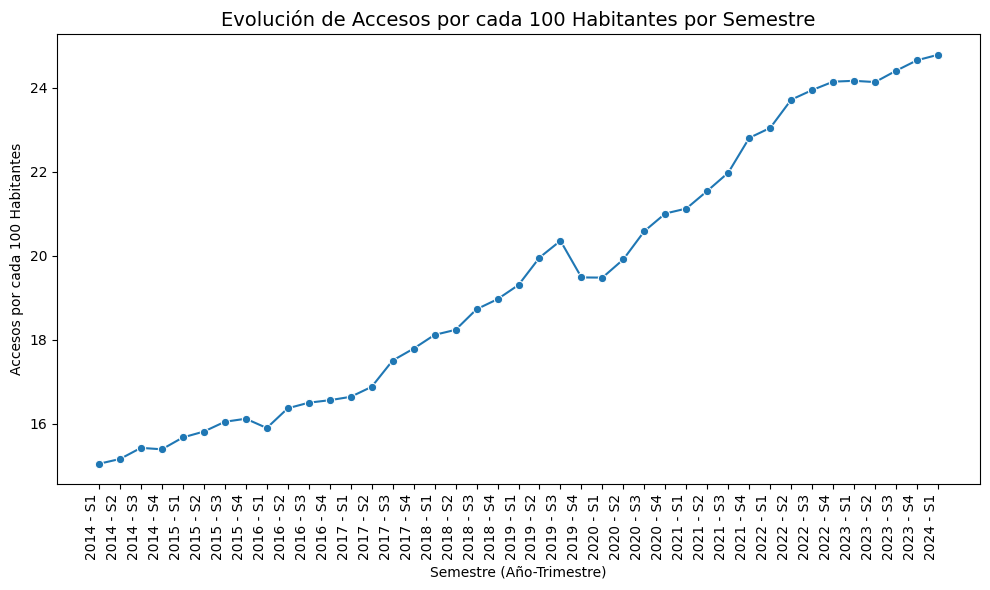

In [30]:
# Configurar el tamaño del gráfico para que sea más pequeño
plt.figure(figsize=(10, 6))

# Crear el gráfico de líneas
sns.lineplot(data=datos_globales_copia, x='Semestre', y='Accesos por cada 100 hab', marker='o')

# Ajustar las etiquetas del eje x para mejorar la legibilidad
plt.xticks(rotation=90, ha='right')

# Agregar título y etiquetas
plt.title('Evolución de Accesos por cada 100 Habitantes por Semestre', fontsize=14)
plt.xlabel('Semestre (Año-Trimestre)', fontsize=10)
plt.ylabel('Accesos por cada 100 Habitantes', fontsize=10)

# Ajustar el diseño para que se ajuste bien
plt.tight_layout()

# Mostrar el gráfico
plt.show()


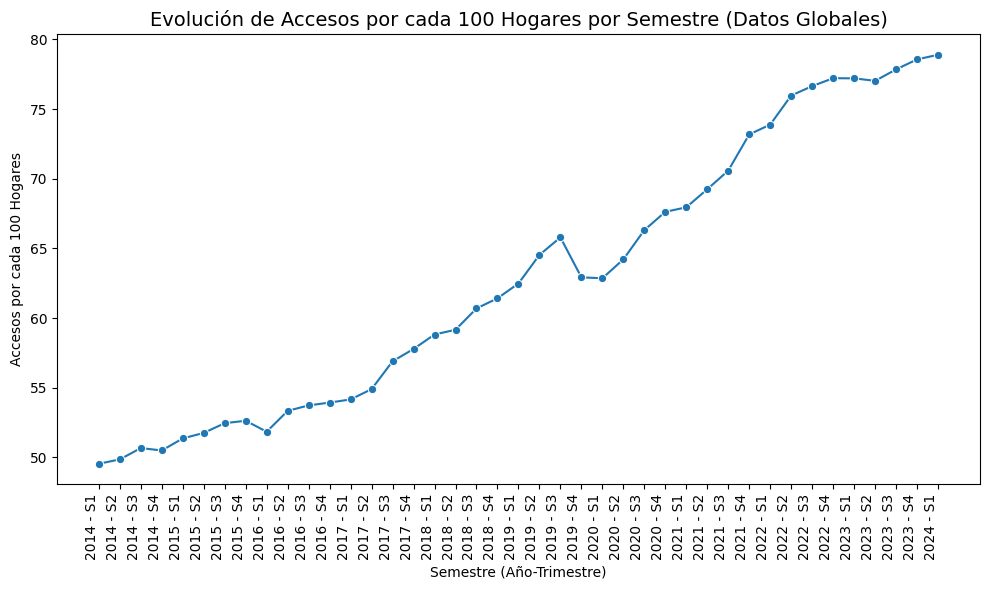

In [31]:
# Configurar el tamaño del gráfico para que sea más pequeño
plt.figure(figsize=(10, 6))

# Crear el gráfico de líneas para la columna 'Accesos por cada 100 hogares'
sns.lineplot(data=datos_globales_copia, x='Semestre', y='Accesos por cada 100 hogares', marker='o')

# Ajustar las etiquetas del eje x para mejorar la legibilidad
plt.xticks(rotation=90, ha='right')

# Agregar título y etiquetas
plt.title('Evolución de Accesos por cada 100 Hogares por Semestre (Datos Globales)', fontsize=14)
plt.xlabel('Semestre (Año-Trimestre)', fontsize=10)
plt.ylabel('Accesos por cada 100 Hogares', fontsize=10)

# Ajustar el diseño para que se ajuste bien
plt.tight_layout()

# Mostrar el gráfico
plt.show()


## Análisis de la Evolución de la Penetración de Internet a Nivel Nacional

### Introducción

En el contexto de la empresa prestadora de servicios de telecomunicaciones, el objetivo es realizar un análisis completo del comportamiento del sector a nivel nacional. A continuación, se presentan dos gráficos que muestran la evolución de los accesos a internet en el país, analizados globalmente.

### Gráfica 1: Evolución de Accesos por cada 100 Habitantes

En esta gráfica se muestra la evolución de la métrica "Accesos por cada 100 Habitantes" y "Accesos por cada 100 Habitantes" por semestre. Este análisis permite observar cómo ha cambiado el acceso a internet a lo largo del tiempo, proporcionándonos una visión clara de las tendencias nacionales en términos de conectividad. 

**Propósito:**
- Identificar las tendencias generales en el acceso a internet en el país.
- Evaluar si el crecimiento es consistente o si hay períodos con caídas notables.

### Gráfica 2: Evolución de Accesos por cada 100 Hogares

Esta gráfica representa la evolución de los "Accesos por cada 100 Hogares" a lo largo del tiempo, también por semestre. Al centrarnos en los hogares, obtenemos una perspectiva sobre la penetración de internet en los hogares en comparación con la población total.

**Propósito:**
- Evaluar el acceso a internet específicamente en el contexto de los hogares, lo cual puede ofrecer una visión diferente respecto a la conectividad.
- Evaluar si el crecimiento es consistente o si hay períodos con caídas notables.

### Conclusiones

Tendencia Positiva continua: Las gráficas muestras una evolución positiva tanto en los "Accesos por cada 100 Hogares" como en "Accesos por cada 100 Habitantes", durante los últimos cuatro años, lo que indica un crecimiento sostenido en la penetración de internet a nivel nacional. Este aumento es una señal positiva de que más hogares están accediendo a servicios de internet, lo que sugiere una expansión continua en el acceso a la conectividad.
Estas gráficas proporcionan una visión integral del acceso a internet en el país, crucial para que la empresa pueda ajustar sus estrategias y mejorar su posicionamiento en el mercado.


In [32]:
# Leer la hoja 'Accesos por velocidad' del archivo Excel
Accesos_por_velocidad_limpio = pd.read_excel(file_path, sheet_name='Accesos por velocidad')

# Mostrar las primeras filas del DataFrame para verificar
print(Accesos_por_velocidad_limpio.head())

    Año  Trimestre        Provincia  HASTA 512 kbps  + 512 Kbps - 1 Mbps  \
0  2024          1     Buenos Aires         26002.0              22510.0   
1  2024          1  Capital Federal           516.0               5418.0   
2  2024          1        Catamarca            71.0                176.0   
3  2024          1            Chaco           236.0                416.0   
4  2024          1           Chubut           111.0               1083.0   

   + 1 Mbps - 6 Mbps  + 6 Mbps - 10 Mbps  + 10 Mbps - 20 Mbps  \
0           221185.0            233225.0             241778.0   
1            29753.0             51415.0              37369.0   
2             2872.0              3424.0               4204.0   
3            14156.0              9044.0               5533.0   
4            43828.0             31885.0              23024.0   

   + 20 Mbps - 30 Mbps  + 30 Mbps     OTROS      Total  
0             106418.0  4068292.0  125147.0  5044557.0  
1               5957.0  1374283.0     

In [33]:
# Leer la hoja 'Accesos por velocidad' del archivo Excel
Accesos_por_velocidad = pd.read_excel(file_path, sheet_name='Accesos por velocidad')

# Mostrar las primeras filas del DataFrame para verificar
print(Accesos_por_velocidad.head())

    Año  Trimestre        Provincia  HASTA 512 kbps  + 512 Kbps - 1 Mbps  \
0  2024          1     Buenos Aires         26002.0              22510.0   
1  2024          1  Capital Federal           516.0               5418.0   
2  2024          1        Catamarca            71.0                176.0   
3  2024          1            Chaco           236.0                416.0   
4  2024          1           Chubut           111.0               1083.0   

   + 1 Mbps - 6 Mbps  + 6 Mbps - 10 Mbps  + 10 Mbps - 20 Mbps  \
0           221185.0            233225.0             241778.0   
1            29753.0             51415.0              37369.0   
2             2872.0              3424.0               4204.0   
3            14156.0              9044.0               5533.0   
4            43828.0             31885.0              23024.0   

   + 20 Mbps - 30 Mbps  + 30 Mbps     OTROS      Total  
0             106418.0  4068292.0  125147.0  5044557.0  
1               5957.0  1374283.0     

In [34]:
# Eliminar la columna 'OTROS' del DataFrame
Accesos_por_velocidad = Accesos_por_velocidad.drop(columns=['OTROS'])

# Mostrar el DataFrame para verificar la eliminación
print(Accesos_por_velocidad.head())

    Año  Trimestre        Provincia  HASTA 512 kbps  + 512 Kbps - 1 Mbps  \
0  2024          1     Buenos Aires         26002.0              22510.0   
1  2024          1  Capital Federal           516.0               5418.0   
2  2024          1        Catamarca            71.0                176.0   
3  2024          1            Chaco           236.0                416.0   
4  2024          1           Chubut           111.0               1083.0   

   + 1 Mbps - 6 Mbps  + 6 Mbps - 10 Mbps  + 10 Mbps - 20 Mbps  \
0           221185.0            233225.0             241778.0   
1            29753.0             51415.0              37369.0   
2             2872.0              3424.0               4204.0   
3            14156.0              9044.0               5533.0   
4            43828.0             31885.0              23024.0   

   + 20 Mbps - 30 Mbps  + 30 Mbps      Total  
0             106418.0  4068292.0  5044557.0  
1               5957.0  1374283.0  1504711.0  
2          

In [35]:
# Calcular el porcentaje de accesos en cada rango de velocidad
for col in ['HASTA 512 kbps', '+ 512 Kbps - 1 Mbps', '+ 1 Mbps - 6 Mbps', '+ 6 Mbps - 10 Mbps', '+ 10 Mbps - 20 Mbps', '+ 20 Mbps - 30 Mbps', '+ 30 Mbps']:
    Accesos_por_velocidad[f'{col}_Porcentaje'] = (Accesos_por_velocidad[col] / Accesos_por_velocidad['Total']) * 100


In [36]:
# Asumir un valor promedio para cada rango de velocidad en Mbps
velocidad = {
    'HASTA 512 kbps': 0.256,       # 512 kbps = 0.512 Mbps / 2
    '+ 512 Kbps - 1 Mbps': 0.75,
    '+ 1 Mbps - 6 Mbps': 3.5,
    '+ 6 Mbps - 10 Mbps': 8,
    '+ 10 Mbps - 20 Mbps': 15,
    '+ 20 Mbps - 30 Mbps': 25,
    '+ 30 Mbps': 35
}

# Calcular el promedio ponderado de velocidad
Accesos_por_velocidad['Promedio_Velocidad'] = sum(
    Accesos_por_velocidad[f'{col}_Porcentaje'] * velocidad[col] for col in velocidad
) / 100


In [37]:
# Agrupar por año y calcular la media de velocidad
calidad_anual = Accesos_por_velocidad.groupby('Año')['Promedio_Velocidad'].mean().reset_index()


In [38]:
# Agrupar por provincia y año para obtener la calidad promedio
calidad_provincia_anual = Accesos_por_velocidad.groupby(['Año', 'Provincia'])['Promedio_Velocidad'].mean().reset_index()


In [39]:
# Redondear la columna 'Promedio_Velocidad' a dos decimales
calidad_provincia_anual['Promedio_Velocidad'] = calidad_provincia_anual['Promedio_Velocidad'].round(2)


In [40]:
calidad_provincia_anual.to_excel('calidad_provincia_anual.xlsx', index=False)

In [41]:
calidad_provincia_anual


,Año,Provincia,Promedio_Velocidad
0,2014,Buenos Aires,3.95
1,2014,Capital Federal,4.40
2,2014,Catamarca,2.99
3,2014,Chaco,3.53
4,2014,Chubut,3.16
...,...,...,...
259,2024,Santa Cruz,11.60
260,2024,Santa Fe,25.12
261,2024,Santiago Del Estero,15.03
262,2024,Tierra Del Fuego,13.23


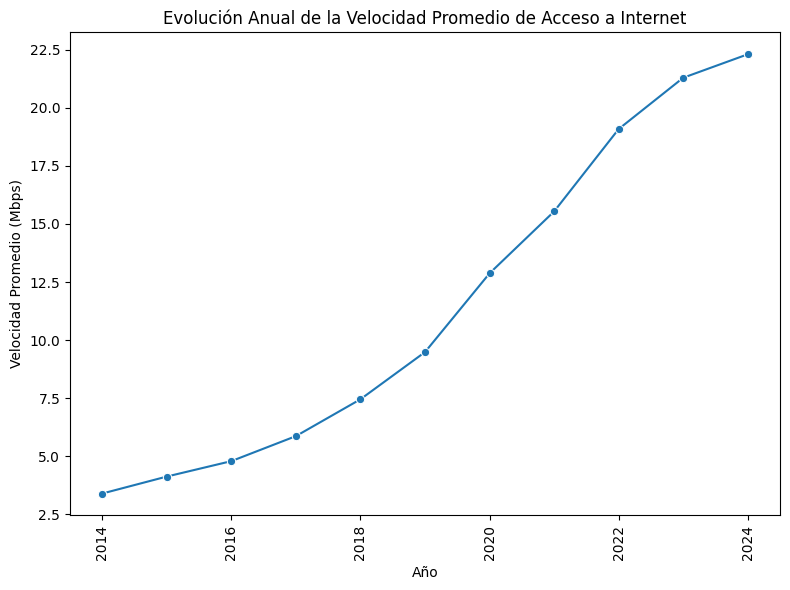

In [42]:
plt.figure(figsize=(8, 6))
sns.lineplot(data=calidad_anual, x='Año', y='Promedio_Velocidad', marker='o')
plt.title('Evolución Anual de la Velocidad Promedio de Acceso a Internet')
plt.xlabel('Año')
plt.ylabel('Velocidad Promedio (Mbps)')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

In [43]:
# Crear una copia del DataFrame original
Accesos_por_veloc_porc= Accesos_por_velocidad.copy()

# Eliminar las columnas especificadas
columnas_a_eliminar = ['HASTA 512 kbps', '+ 512 Kbps - 1 Mbps', '+ 1 Mbps - 6 Mbps', 
                       '+ 6 Mbps - 10 Mbps', '+ 10 Mbps - 20 Mbps', '+ 20 Mbps - 30 Mbps', 
                       '+ 30 Mbps', 'Total', 'Promedio_Velocidad']

Accesos_por_veloc_porc = Accesos_por_veloc_porc.drop(columns=columnas_a_eliminar)



In [44]:
# Limitar las columnas porcentuales a dos decimales
columnas_porcentuales = [
    'HASTA 512 kbps_Porcentaje', 
    '+ 512 Kbps - 1 Mbps_Porcentaje', 
    '+ 1 Mbps - 6 Mbps_Porcentaje', 
    '+ 6 Mbps - 10 Mbps_Porcentaje', 
    '+ 10 Mbps - 20 Mbps_Porcentaje', 
    '+ 20 Mbps - 30 Mbps_Porcentaje', 
    '+ 30 Mbps_Porcentaje'
]

# Redondear los valores a dos decimales
Accesos_por_veloc_porc[columnas_porcentuales] = Accesos_por_veloc_porc[columnas_porcentuales].round(2)


In [45]:
# Diccionario con los nombres actuales y los nuevos nombres
nuevos_nombres_columnas = {
    'HASTA 512 kbps_Porcentaje': '512kbps_%',
    '+ 512 Kbps - 1 Mbps_Porcentaje': '512kbps_1mbps_%',
    '+ 1 Mbps - 6 Mbps_Porcentaje': '1mbps_6mbps_%',
    '+ 6 Mbps - 10 Mbps_Porcentaje': '6mbps_10mbps_%',
    '+ 10 Mbps - 20 Mbps_Porcentaje': '10mbps_20mbps_%',
    '+ 20 Mbps - 30 Mbps_Porcentaje': '20mbps_30mbps_%',
    '+ 30 Mbps_Porcentaje': '30mbps_%'
}

# Renombrar las columnas en el DataFrame
Accesos_por_veloc_porc = Accesos_por_veloc_porc.rename(columns=nuevos_nombres_columnas)

In [46]:
# Unificar las columnas sumando los valores
Accesos_por_veloc_porc['1mbps_total_%'] = Accesos_por_veloc_porc['512kbps_%'] + Accesos_por_veloc_porc['512kbps_1mbps_%']

In [47]:
# Eliminar las columnas originales
columnas_a_eliminar = ['512kbps_%', '512kbps_1mbps_%']
Accesos_por_veloc_porc = Accesos_por_veloc_porc.drop(columns=columnas_a_eliminar)

In [48]:
# Reordenar las columnas para que la nueva columna esté en la primera posición después de Año, Trimestre y Provincia
columnas = ['Año', 'Trimestre', 'Provincia', '1mbps_total_%', '1mbps_6mbps_%', '6mbps_10mbps_%', '10mbps_20mbps_%', '20mbps_30mbps_%', '30mbps_%']
Accesos_por_veloc_porc = Accesos_por_veloc_porc[columnas]

In [49]:
# Unir las columnas 1mbps_total_% y 1mbps_6mbps_% sumando los valores
Accesos_por_veloc_porc['6mbps_total_%'] = Accesos_por_veloc_porc['1mbps_total_%'] + Accesos_por_veloc_porc['1mbps_6mbps_%']

# Eliminar las columnas originales
columnas_a_eliminar = ['1mbps_total_%', '1mbps_6mbps_%']
Accesos_por_veloc_porc = Accesos_por_veloc_porc.drop(columns=columnas_a_eliminar)


In [50]:
# Definir el nuevo orden de columnas
columnas = ['Año', 'Trimestre', 'Provincia', '6mbps_total_%', '6mbps_10mbps_%', '10mbps_20mbps_%', '20mbps_30mbps_%', '30mbps_%']

# Reordenar el DataFrame con el nuevo orden de columnas
Accesos_por_veloc_porc = Accesos_por_veloc_porc[columnas]

In [51]:
Accesos_por_veloc_porc.to_excel('Accesos_por_veloc_porc.xlsx', index=False)

In [52]:
promedio_velocidad_provincia = Accesos_por_veloc_porc.groupby(['Año', 'Provincia']).mean().reset_index()

In [53]:
promedio_velocidad_provincia

,Año,Provincia,Trimestre,6mbps_total_%,6mbps_10mbps_%,10mbps_20mbps_%,20mbps_30mbps_%,30mbps_%
0,2014,Buenos Aires,2.5,91.4575,5.8375,2.5175,0.0175,0.1675
1,2014,Capital Federal,2.5,87.2325,7.2725,4.9550,0.0200,0.5175
2,2014,Catamarca,2.5,90.8400,8.4575,0.7025,0.0000,0.0000
3,2014,Chaco,2.5,88.6175,9.1150,2.2075,0.0550,0.0000
4,2014,Chubut,2.5,99.9575,0.0375,0.0000,0.0000,0.0000
...,...,...,...,...,...,...,...,...
259,2024,Santa Cruz,2.5,9.9100,12.1650,11.1150,6.4900,20.0300
260,2024,Santa Fe,2.5,9.4550,17.3450,6.4700,2.7650,62.1750
261,2024,Santiago Del Estero,2.5,11.3500,43.2950,19.7050,4.6800,20.2100
262,2024,Tierra Del Fuego,2.5,17.9950,18.1000,25.6350,17.8800,8.2050


In [54]:
Accesos_por_veloc_porc

,Año,Trimestre,Provincia,6mbps_total_%,6mbps_10mbps_%,10mbps_20mbps_%,20mbps_30mbps_%,30mbps_%
0,2024,1,Buenos Aires,5.35,4.62,4.79,2.11,80.65
1,2024,1,Capital Federal,2.37,3.42,2.48,0.40,91.33
2,2024,1,Catamarca,4.15,4.57,5.61,2.43,83.13
3,2024,1,Chaco,9.52,5.81,3.56,3.68,74.98
4,2024,1,Chubut,26.38,18.68,13.49,11.87,19.83
...,...,...,...,...,...,...,...,...
979,2014,1,Santa Cruz,99.99,0.00,0.00,0.00,0.00
980,2014,1,Santa Fe,94.49,4.02,1.35,0.00,0.13
981,2014,1,Santiago Del Estero,93.18,6.53,0.29,0.00,0.00
982,2014,1,Tierra Del Fuego,99.99,0.02,0.00,0.00,0.00


In [55]:
# Leer la pestaña "Totales Accesos por velocidad"
totales_accesos = pd.read_excel(file_path, sheet_name="Totales Accesos por velocidad")

# Mostrar las primeras filas del DataFrame para verificar la carga de datos
print(totales_accesos.head())

    Año  Trimestre  Hasta 512 kbps  Entre 512 Kbps y 1 Mbps  \
0  2024          1           28801                    69355   
1  2023          4           29708                    71742   
2  2023          3           30274                    80609   
3  2023          2           30827                    79405   
4  2023          1           31437                    82048   

   Entre 1 Mbps y 6 Mbps  Entre 6 Mbps y 10 Mbps  Entre 10 Mbps y 20 Mbps  \
0                 866152                  950930                   672155   
1                 900253                  978108                   697232   
2                 945608                  998725                   720084   
3                 963510                 1028250                   734125   
4                1001553                 1060321                   729194   

   Entre 20 Mbps y 30 Mbps  Más de 30 Mbps   OTROS     Total  
0                   353896         8363694  328173  11633156  
1                   350290      

In [56]:
# Eliminar la columna "Otros" del DataFrame
totales_accesos = totales_accesos.drop(columns=['OTROS'])

# Verificar la eliminación mostrando las primeras filas del DataFrame
print(totales_accesos.head())


    Año  Trimestre  Hasta 512 kbps  Entre 512 Kbps y 1 Mbps  \
0  2024          1           28801                    69355   
1  2023          4           29708                    71742   
2  2023          3           30274                    80609   
3  2023          2           30827                    79405   
4  2023          1           31437                    82048   

   Entre 1 Mbps y 6 Mbps  Entre 6 Mbps y 10 Mbps  Entre 10 Mbps y 20 Mbps  \
0                 866152                  950930                   672155   
1                 900253                  978108                   697232   
2                 945608                  998725                   720084   
3                 963510                 1028250                   734125   
4                1001553                 1060321                   729194   

   Entre 20 Mbps y 30 Mbps  Más de 30 Mbps     Total  
0                   353896         8363694  11633156  
1                   350290         8224736  1154

In [57]:
# Contar los valores faltantes en cada columna
valores_faltantes = totales_accesos.isnull().sum()

# Mostrar los resultados
print("Valores faltantes por columna:")
print(valores_faltantes)


Valores faltantes por columna:
Año                        0
Trimestre                  0
Hasta 512 kbps             0
Entre 512 Kbps y 1 Mbps    0
Entre 1 Mbps y 6 Mbps      0
Entre 6 Mbps y 10 Mbps     0
Entre 10 Mbps y 20 Mbps    0
Entre 20 Mbps y 30 Mbps    0
Más de 30 Mbps             0
Total                      0
dtype: int64


In [58]:
# Contar los registros duplicados
duplicados = totales_accesos.duplicated().sum()

# Mostrar el número de duplicados
print(f"Cantidad de registros duplicados: {duplicados}")




Cantidad de registros duplicados: 0


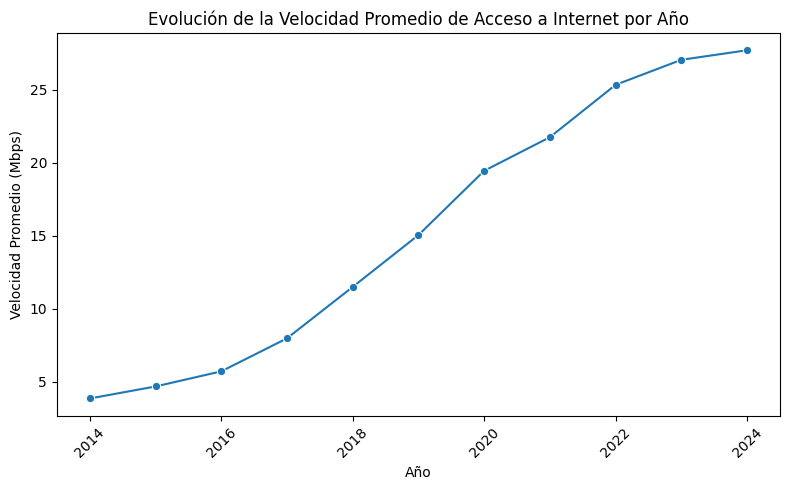

In [59]:
# Asignar valores representativos a cada rango de velocidad
valores_representativos = {
    'Hasta 512 kbps': 0.5,  # Mbps
    'Entre 512 Kbps y 1 Mbps': 0.75,
    'Entre 1 Mbps y 6 Mbps': 3.5,
    'Entre 6 Mbps y 10 Mbps': 8,
    'Entre 10 Mbps y 20 Mbps': 15,
    'Entre 20 Mbps y 30 Mbps': 25,
    'Más de 30 Mbps': 35
}

# Crear una nueva columna para cada rango de velocidad multiplicado por su valor representativo
for columna, valor in valores_representativos.items():
    totales_accesos[f'{columna}_ponderado'] = totales_accesos[columna] * valor

# Calcular la velocidad promedio ponderada para cada fila (suma ponderada de velocidades / total de accesos)
totales_accesos['Velocidad_Promedio'] = totales_accesos[[f'{columna}_ponderado' for columna in valores_representativos.keys()]].sum(axis=1) / totales_accesos['Total']

# Calcular la velocidad promedio anual
velocidad_promedio_anual = totales_accesos.groupby('Año')['Velocidad_Promedio'].mean().reset_index()

# Graficar la evolución de la velocidad promedio por año
plt.figure(figsize=(8, 5))
sns.lineplot(data=velocidad_promedio_anual, x='Año', y='Velocidad_Promedio', marker='o')
plt.title('Evolución de la Velocidad Promedio de Acceso a Internet por Año')
plt.xlabel('Año')
plt.ylabel('Velocidad Promedio (Mbps)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()



## Análisis de la Calidad del Servicio de Internet

### Introducción

Este análisis tiene como objetivo medir y evaluar la calidad del acceso a internet a nivel nacional, desglosando los accesos por velocidad de conexión. Los datos proporcionan información sobre la distribución de accesos en diferentes rangos de velocidad, lo cual es fundamental para comprender la calidad del servicio y orientar las estrategias de la empresa.

### Gráfica: Evolución Anual de la Velocidad Promedio de Acceso

El gráfico de líneas muestra cómo ha cambiado la velocidad promedio de acceso a internet por año. Esto ayuda a identificar tendencias y patrones en la mejora del servicio a lo largo del tiempo.

**Propósito:**
- Evaluar la mejora en la calidad del servicio de internet en el país.
- Identificar años con mejoras significativas o caídas en la velocidad promedio.


### Conclusiones

- **Tendencias Generales:** La evolución anual de la velocidad promedio indica un aumento en la calidad del acceso a internet en el país, lo que sugiere una mejora continua en los servicios.

Este análisis proporciona una visión integral de la calidad del acceso a internet en el país, facilitando la identificación de oportunidades de mejora y la formulación de estrategias para optimizar el servicio ofrecido.


In [60]:
# Leer la hoja 'Totales Accesos Por Tecnología'
totales_accesos_tecnologia = pd.read_excel(file_path, sheet_name='Totales Accesos Por Tecnología')

# Mostrar las primeras filas del DataFrame para verificar que se ha cargado correctamente
print(totales_accesos_tecnologia.head())

    Año  Trimestre     ADSL  Cablemodem  Fibra óptica  Wireless   Otros  \
0  2024          1   774475     5986957       4015101    598682  257941   
1  2023          4   836390     6022532       3908183    585760  194796   
2  2023          3   897895     6018832       3708718    581436  200027   
3  2023          2  1006509     5997149       3463988    581823  202428   
4  2023          1  1204417     6002582       3243411    576647  214838   

      Total        Periodo  
0  11633156   Ene-Mar 2024  
1  11547661   Oct-Dic 2023  
2  11406908  Jul-Sept 2023  
3  11251897   Abr-Jun 2023  
4  11241895   Ene-Mar 2023  


In [61]:
# Eliminar las columnas 'Periodo' y 'Otros'
totales_accesos_tecnologia = totales_accesos_tecnologia.drop(columns=['Periodo', 'Otros'])

# Verificar las columnas después de la eliminación
print("Columnas después de eliminación:", totales_accesos_tecnologia.columns)

Columnas después de eliminación: Index(['Año', 'Trimestre', 'ADSL', 'Cablemodem', 'Fibra óptica', 'Wireless',
       'Total'],
      dtype='object')


In [62]:
# Crear una copia del DataFrame para trabajar con ella
df_copia = totales_accesos_tecnologia.copy()

In [63]:
# Eliminar la columna 'Trimestre'
df_copia = df_copia.drop(columns=['Trimestre'])

In [64]:
# Agrupar por 'Año' y sumar los valores de las demás columnas
df_anual = df_copia.groupby('Año').sum().reset_index()
# Suponiendo que df_anual ya está definido
print(df_anual.head())

    Año      ADSL  Cablemodem  Fibra óptica  Wireless     Total
0  2014  14884750     9975087        604862    305234  26056633
1  2015  15115694    11162971        620877    331431  27473819
2  2016  15073814    12177088        680127    337396  28496058
3  2017  14639302    14148063        766312    432844  30330683
4  2018  13981984    16571272       1079124    870047  32968187


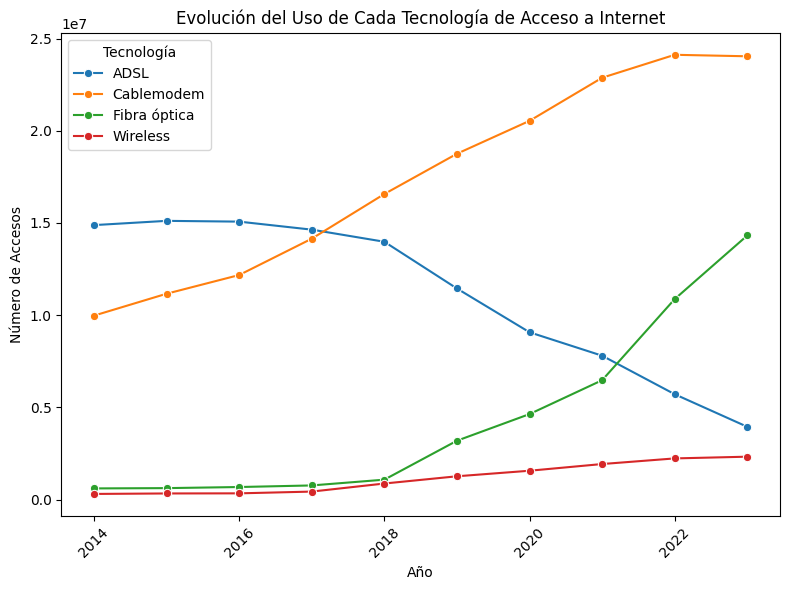

In [65]:
# Suponiendo que `df_anual` es el DataFrame con los datos agrupados por año
# Excluye el año 2024
df_anual = df_anual[df_anual['Año'] != 2024]

# Establecer el tamaño del gráfico
plt.figure(figsize=(8, 6))

# Graficar cada tecnología
for columna in ['ADSL', 'Cablemodem', 'Fibra óptica', 'Wireless']:
    sns.lineplot(data=df_anual, x='Año', y=columna, label=columna, marker='o')

# Configurar título y etiquetas
plt.title('Evolución del Uso de Cada Tecnología de Acceso a Internet')
plt.xlabel('Año')
plt.ylabel('Número de Accesos')
plt.legend(title='Tecnología')
plt.xticks(rotation=45)
plt.tight_layout()

# Mostrar el gráfico
plt.show()

## Justificación del Uso del Gráfico y Conclusiones

### Justificación del Gráfico

El gráfico que se presenta a continuación muestra la evolución en el uso de diferentes tecnologías de conexión a Internet a lo largo del tiempo. Este tipo de visualización es crucial para entender las tendencias y patrones en la adopción de tecnologías, permitiendo una comparación clara entre las diferentes opciones disponibles. A través de este gráfico, podemos observar cómo cada tecnología ha evolucionado y qué tan popular se ha vuelto a lo largo de los años.

### Conclusiones

1. **ADSL (Línea de Abonado Digital Asimétrico)**
   - **Tendencia:** Disminución con el paso del tiempo.
   - **Observación:** La tecnología ADSL ha experimentado una disminución en su uso a lo largo de los años. Esto podría deberse a la llegada de tecnologías más avanzadas que ofrecen mejores velocidades y servicios.

2. **Cablemodem**
   - **Tendencia:** Mayor uso con una meseta a partir de 2022.
   - **Observación:** El cablemodem ha sido la tecnología más utilizada durante el período observado. Sin embargo, desde 2022, su tasa de adopción ha alcanzado una meseta, indicando que la saturación del mercado podría haber ocurrido, y el crecimiento de nuevos usuarios se ha estabilizado.

3. **Fibra Óptica**
   - **Tendencia:** Crecimiento constante y rápida adopción.
   - **Observación:** La fibra óptica ha mostrado una pendiente positiva significativa, convirtiéndose en la segunda tecnología más utilizada. Este crecimiento constante refleja el aumento en la demanda de conexiones de alta velocidad y la expansión de la infraestructura de fibra óptica.

4. **Wireless (Inalámbrico)**
   - **Tendencia:** Uso casi constante y bajo.
   - **Observación:** La tecnología inalámbrica ha sido la menos utilizada y su tasa de adopción se ha mantenido casi constante a lo largo del tiempo. Esto podría deberse a las limitaciones en velocidad y cobertura en comparación con otras tecnologías.

Este análisis permite a las empresas y responsables de políticas tomar decisiones informadas sobre dónde invertir en infraestructura y cómo adaptar sus estrategias para satisfacer la demanda de los usuarios en función de la evolución de estas tecnologías.


In [66]:
# Leer la hoja 'Totales Accesos Por Tecnología'
Accesos_Tecnología_provincia = pd.read_excel(file_path, sheet_name='Accesos Por Tecnología')

In [67]:
# Eliminar las columnas 'Otros' y 'Total'
Accesos_Tecnología_provincia.drop(['Otros', 'Total'], axis=1, inplace=True)


# Verificar valores nulos
valores_nulos = Accesos_Tecnología_provincia.isnull().sum()
print("Valores nulos por columna:\n", valores_nulos)

# Verificar si hay duplicados
hay_duplicados = Accesos_Tecnología_provincia.duplicated().sum()
print("Número de filas duplicadas:", hay_duplicados)

Valores nulos por columna:
 Año             1
Trimestre       1
Provincia       2
ADSL            2
Cablemodem      2
Fibra óptica    2
Wireless        2
dtype: int64
Número de filas duplicadas: 0


In [68]:
# Mostrar las filas que contienen valores nulos
filas_nulas = Accesos_Tecnología_provincia[Accesos_Tecnología_provincia.isnull().any(axis=1)]
print(filas_nulas)


     Año                                          Trimestre Provincia  ADSL  \
984  NaN                                                NaN       NaN   NaN   
985    *  Los datos provinciales no coinciden a nivel na...       NaN   NaN   

     Cablemodem  Fibra óptica  Wireless  
984         NaN           NaN       NaN  
985         NaN           NaN       NaN  


In [69]:
# Eliminar las filas que contienen valores nulos
Accesos_Tecnología_provincia = Accesos_Tecnología_provincia.dropna()

In [70]:
Accesos_Tecnología_provincia

,Año,Trimestre,Provincia,ADSL,Cablemodem,Fibra óptica,Wireless
0,2024,1,Buenos Aires,203297.0,2790663.0,1799013.0,150290.0
1,2024,1,Capital Federal,70108.0,1177475.0,203756.0,4493.0
2,2024,1,Catamarca,5901.0,11025.0,56542.0,1384.0
3,2024,1,Chaco,11343.0,58929.0,64463.0,8404.0
4,2024,1,Chubut,26306.0,77217.0,26356.0,30867.0
...,...,...,...,...,...,...,...
979,2014,1,Santa Cruz,18927.0,100.0,381.0,4092.0
980,2014,1,Santa Fe,322662.0,174296.0,3059.0,5951.0
981,2014,1,Santiago Del Estero,32567.0,3598.0,19.0,915.0
982,2014,1,Tierra Del Fuego,21618.0,2837.0,648.0,1.0


In [71]:
# Calcular el total de accesos por fila
Accesos_Tecnología_provincia['Total_Accesos'] = (
    Accesos_Tecnología_provincia['ADSL'] +
    Accesos_Tecnología_provincia['Cablemodem'] +
    Accesos_Tecnología_provincia['Fibra óptica'] +
    Accesos_Tecnología_provincia['Wireless']
)

# Convertir a porcentajes
Accesos_Tecnología_provincia['ADSL_%'] = (Accesos_Tecnología_provincia['ADSL'] / Accesos_Tecnología_provincia['Total_Accesos']) * 100
Accesos_Tecnología_provincia['Cablemodem_%'] = (Accesos_Tecnología_provincia['Cablemodem'] / Accesos_Tecnología_provincia['Total_Accesos']) * 100
Accesos_Tecnología_provincia['Fibra óptica_%'] = (Accesos_Tecnología_provincia['Fibra óptica'] / Accesos_Tecnología_provincia['Total_Accesos']) * 100
Accesos_Tecnología_provincia['Wireless_%'] = (Accesos_Tecnología_provincia['Wireless'] / Accesos_Tecnología_provincia['Total_Accesos']) * 100

# Eliminar la columna Total_Accesos si no la necesitas
Accesos_Tecnología_provincia.drop(columns=['Total_Accesos'], inplace=True)

# Ver el DataFrame con las nuevas columnas de porcentaje
print(Accesos_Tecnología_provincia.head())


    Año Trimestre        Provincia      ADSL  Cablemodem  Fibra óptica  \
0  2024         1     Buenos Aires  203297.0   2790663.0     1799013.0   
1  2024         1  Capital Federal   70108.0   1177475.0      203756.0   
2  2024         1        Catamarca    5901.0     11025.0       56542.0   
3  2024         1            Chaco   11343.0     58929.0       64463.0   
4  2024         1           Chubut   26306.0     77217.0       26356.0   

   Wireless     ADSL_%  Cablemodem_%  Fibra óptica_%  Wireless_%  
0  150290.0   4.112607     56.453865       36.393229    3.040299  
1    4493.0   4.815666     80.879868       13.995846    0.308621  
2    1384.0   7.883557     14.729065       75.538396    1.848982  
3    8404.0   7.924465     41.169073       45.035245    5.871216  
4   30867.0  16.364948     48.036654       16.396053   19.202344  


In [72]:
# Crear una copia del DataFrame original
Accesos_Tecnología_provincia_porc = Accesos_Tecnología_provincia.copy()

# Eliminar las columnas ADSL, Cablemodem, Fibra óptica y Wireless en el nuevo DataFrame
Accesos_Tecnología_provincia_porc.drop(columns=['ADSL', 'Cablemodem', 'Fibra óptica', 'Wireless'], inplace=True)

In [73]:
# Limitar todas las columnas de porcentaje a 2 decimales en un solo paso
Accesos_Tecnología_provincia_porc[['ADSL_%', 'Cablemodem_%', 'Fibra óptica_%', 'Wireless_%']] = Accesos_Tecnología_provincia_porc[['ADSL_%', 'Cablemodem_%', 'Fibra óptica_%', 'Wireless_%']].round(2)

# Verificar el DataFrame después de redondear
print(Accesos_Tecnología_provincia_porc.head())


    Año Trimestre        Provincia  ADSL_%  Cablemodem_%  Fibra óptica_%  \
0  2024         1     Buenos Aires    4.11         56.45           36.39   
1  2024         1  Capital Federal    4.82         80.88           14.00   
2  2024         1        Catamarca    7.88         14.73           75.54   
3  2024         1            Chaco    7.92         41.17           45.04   
4  2024         1           Chubut   16.36         48.04           16.40   

   Wireless_%  
0        3.04  
1        0.31  
2        1.85  
3        5.87  
4       19.20  


In [74]:
Accesos_Tecnología_provincia_porc.to_excel('Accesos_Tecnología_provincia_porc.xlsx', index=False)

In [75]:
# Filtrar el DataFrame para quedarse solo con las filas donde la columna 'año' es 2024
Accesos_Tecnología_provincia_2024 = Accesos_Tecnología_provincia_porc[Accesos_Tecnología_provincia_porc['Año'] == 2024]

In [76]:
Accesos_Tecnología_provincia_2024.to_excel('Accesos_Tecnología_provincia_2024.xlsx', index=False)

In [77]:
Accesos_Tecnología_provincia_porc['Año'] = Accesos_Tecnología_provincia_porc['Año'].astype(int)

ValueError: invalid literal for int() with base 10: '2019 *'

In [78]:
# Verificar el tipo de valor de cada columna en el DataFrame
print(Accesos_Tecnología_provincia_porc.dtypes)

Año                object
Trimestre          object
Provincia          object
ADSL_%            float64
Cablemodem_%      float64
Fibra óptica_%    float64
Wireless_%        float64
dtype: object


In [79]:
# Ruta a la carpeta donde están los archivos del shapefile
shapefile_folder = 'C:/Users/Usuario/Desktop/proyecto 1/'

# Nombre base del shapefile para provincias
shapefile_base_name = 'gadm41_ARG_1'

# Cargar el shapefile (necesita los archivos .shp, .shx, .dbf)
shapefile_path = f'{shapefile_folder}/{shapefile_base_name}.shp'
gdf = gpd.read_file(shapefile_path)

# Mostrar las primeras filas del GeoDataFrame
print(gdf.head())

     GID_1 GID_0    COUNTRY                  NAME_1  \
0  ARG.1_1   ARG  Argentina            Buenos Aires   
1  ARG.2_1   ARG  Argentina               Catamarca   
2  ARG.3_1   ARG  Argentina                   Chaco   
3  ARG.4_1   ARG  Argentina                  Chubut   
4  ARG.5_1   ARG  Argentina  Ciudad de Buenos Aires   

                          VARNAME_1 NL_NAME_1            TYPE_1  \
0               Baires|Buenos Ayres        NA         Provincia   
1                                NA        NA         Provincia   
2    El Chaco|Presidente Juan Peron        NA         Provincia   
3                                NA        NA         Provincia   
4  BUENOS AIRES D.F.|Capital Federa        NA  Distrito Federal   

          ENGTYPE_1 CC_1 HASC_1 ISO_1  \
0          Province   NA  AR.BA  AR-B   
1          Province   NA  AR.CT  AR-K   
2          Province   NA  AR.CC  AR-H   
3          Province   NA  AR.CH  AR-U   
4  Federal District   NA  AR.DF    NA   

                   

In [80]:
print(gdf.columns)  # Verifica las columnas disponibles
print(gdf['geometry'].head())  # Verifica los datos en la columna geometry


Index(['GID_1', 'GID_0', 'COUNTRY', 'NAME_1', 'VARNAME_1', 'NL_NAME_1',
       'TYPE_1', 'ENGTYPE_1', 'CC_1', 'HASC_1', 'ISO_1', 'geometry'],
      dtype='object')
0    MULTIPOLYGON (((-62.10181 -40.55375, -62.10208...
1    POLYGON ((-65.14583 -28.6656, -65.1441 -28.666...
2    POLYGON ((-60.11628 -25.6566, -60.11488 -25.66...
3    MULTIPOLYGON (((-66.99986 -45.99986, -66.99986...
4    POLYGON ((-58.34292 -34.63319, -58.34297 -34.6...
Name: geometry, dtype: geometry


In [81]:


# Datos corregidos con la misma longitud
data = {
    'NAME_2': [
        'Buenos Aires', 'Catamarca', 'Chaco', 'Chubut', 'Ciudad de Buenos Aires',
        'Córdoba', 'Corrientes', 'Entre Ríos', 'Formosa', 'Jujuy', 'La Pampa',
        'La Rioja', 'Mendoza', 'Misiones', 'Neuquén', 'Río Negro', 'Salta',
        'San Juan', 'San Luis', 'Santa Cruz', 'Santa Fe', 'Santiago del Estero',
        'Tierra del Fuego', 'Tucumán'
    ],
    'Porcentaje': [
        50, 20, 30, 25, 40, 45, 35, 50, 30, 20, 25, 35, 40, 55, 50, 60, 30,
        35, 40, 45, 50, 20, 40, 43
    ]
}

# Crear el DataFrame
muestra = pd.DataFrame(data)

# Mostrar el DataFrame para verificar
print(muestra)


                    NAME_2  Porcentaje
0             Buenos Aires          50
1                Catamarca          20
2                    Chaco          30
3                   Chubut          25
4   Ciudad de Buenos Aires          40
5                  Córdoba          45
6               Corrientes          35
7               Entre Ríos          50
8                  Formosa          30
9                    Jujuy          20
10                La Pampa          25
11                La Rioja          35
12                 Mendoza          40
13                Misiones          55
14                 Neuquén          50
15               Río Negro          60
16                   Salta          30
17                San Juan          35
18                San Luis          40
19              Santa Cruz          45
20                Santa Fe          50
21     Santiago del Estero          20
22        Tierra del Fuego          40
23                 Tucumán          43


     GID_1 GID_0    COUNTRY                  NAME_1  \
0  ARG.1_1   ARG  Argentina            Buenos Aires   
1  ARG.2_1   ARG  Argentina               Catamarca   
2  ARG.3_1   ARG  Argentina                   Chaco   
3  ARG.4_1   ARG  Argentina                  Chubut   
4  ARG.5_1   ARG  Argentina  Ciudad de Buenos Aires   

                          VARNAME_1 NL_NAME_1            TYPE_1  \
0               Baires|Buenos Ayres        NA         Provincia   
1                                NA        NA         Provincia   
2    El Chaco|Presidente Juan Peron        NA         Provincia   
3                                NA        NA         Provincia   
4  BUENOS AIRES D.F.|Capital Federa        NA  Distrito Federal   

          ENGTYPE_1 CC_1 HASC_1 ISO_1  \
0          Province   NA  AR.BA  AR-B   
1          Province   NA  AR.CT  AR-K   
2          Province   NA  AR.CC  AR-H   
3          Province   NA  AR.CH  AR-U   
4  Federal District   NA  AR.DF    NA   

                   

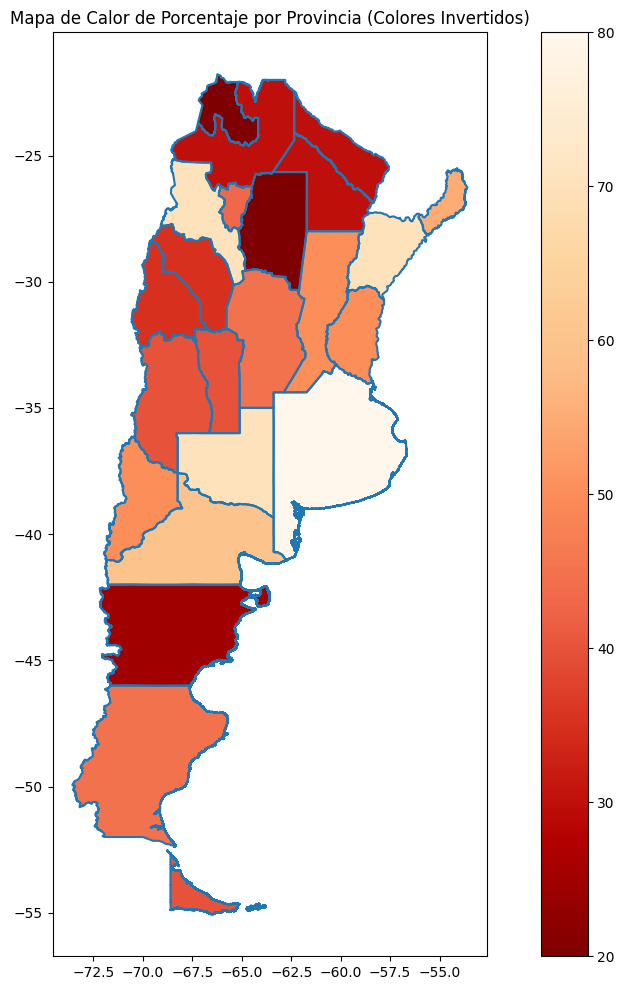

In [83]:
# Ruta a la carpeta donde están los archivos del shapefile
shapefile_folder = 'C:/Users/Usuario/Desktop/proyecto 1/'

# Nombre base del shapefile para provincias
shapefile_base_name = 'gadm41_ARG_1'

# Cargar el shapefile (necesita los archivos .shp, .shx, .dbf)
shapefile_path = f'{shapefile_folder}/{shapefile_base_name}.shp'
gdf = gpd.read_file(shapefile_path)

# Mostrar las primeras filas del GeoDataFrame
print(gdf.head())

# Crear DataFrame de muestra
data = {
    'NAME_2': [
        'Buenos Aires', 'Catamarca', 'Chaco', 'Chubut', 'Ciudad de Buenos Aires',
        'Córdoba', 'Corrientes', 'Entre Ríos', 'Formosa', 'Jujuy', 'La Pampa',
        'La Rioja', 'Mendoza', 'Misiones', 'Neuquén', 'Río Negro', 'Salta',
        'San Juan', 'San Luis', 'Santa Cruz', 'Santa Fe', 'Santiago del Estero',
        'Tierra del Fuego', 'Tucumán'
    ],
    'Porcentaje': [
        81, 69, 47, 85, 81, 91, 52, 69, 40, 58, 100, 80, 53, 57, 80, 71, 56,
        52, 100, 68, 80, 49, 100, 60
    ]
}




muestra = pd.DataFrame(data)

# Renombrar columna en muestra para que coincida con la del GeoDataFrame
muestra = muestra.rename(columns={'NAME_2': 'NAME_1'})

# Unir los datos con el GeoDataFrame
gdf = gdf.merge(muestra, on='NAME_1', how='left')

# Verificar la unión
print(gdf.head())


# Crear el mapa de calor con colores invertidos
fig, ax = plt.subplots(1, 1, figsize=(14, 12))
gdf.boundary.plot(ax=ax)  # Dibuja los límites de las provincias
gdf.plot(column='Porcentaje', ax=ax, legend=True, cmap='OrRd_r', linewidth=0.8, edgecolor='0.8')
ax.set_title('Mapa de Calor de Porcentaje por Provincia (Colores Invertidos)')
plt.show()


